In [1]:
%matplotlib inline

from scipy import signal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os.path as path
import numpy as np
outdir = '/home/eric/Phd_thesis/figures/'
# # # Using seaborn's style
# # plt.style.use('seaborn')

# # width = 345

# nice_fonts = {
#         # Use LaTeX to write all text
#         "text.usetex": True,
#         "font.family": "serif",
#         # Use 10pt font in plots, to match 10pt font in document
#         "axes.labelsize": 10,
#         "font.size": 10,
#         # Make the legend/label fonts a little smaller
#         "legend.fontsize": 8,
#         "xtick.labelsize": 8,
#         "ytick.labelsize": 8,
# }

# mpl.rcParams.update(nice_fonts)
# print("Your style sheets are located at: {}".format(path.join(mpl.__path__[0], 'mpl-data', 'stylelib')))
from my_plot import set_size
from matplotlib import cm
width_pt = 506.45#'thesis'# 
plt.style.use('tex')
output_dir = '/home/eric/Phd_thesis/figures/'

The uncertainty principle shows that the size, the shape and the shift of the window through which we make measurements affects the accuracy of what we compute. For example, let us consider a signal $f(t)$ with Fourier transform $F(\omega)$. Let us assume that we observe only a part of the signal through a window $w(t)$, with Fourier transform $W(\omega)$ centered at $t_0$

\begin{equation}\label{eq:uncertainty_principle2}
    h(t) = f(t)w(t-t_0)
\end{equation}

Due to the shifting property of the Fourier transform, the Fourier transform of the window is $e^{-j\omega t_0}W(\omega)$. Since the window multiplies the signal, the Fourier transform of the window is convolved with the Fourier transform of the signal. Therefore, the Fourier transform of what we observe is given by:

\begin{equation}\label{eq:short_time_fourier_transform}
    H(\omega) = \int_{-\infty}^{\infty}F(\omega - u)e^{-ju t_0}W(u) du
\end{equation}


In general $H(\omega)$ is different from $G(\omega)$ and depends on the locality of the window $t_0$.

To see this behavior, consider a signal $f(t)=A \sin \omega_{0} t$, where $A$ is a positive constant, and a window $w(t)$ defined by a Gaussian function. 

\begin{equation}\label{eq:1d_gaussian_function2}
    w(t)=e^{-\frac{(t-t_0)^2}{2\sigma^2}}
\end{equation}

A Gaussian window is infinite in extent, so it is characterized by its locality $t_0$ and its standard deviation, which in this context is also called \textit{spread} and is denoted by $\sigma$. 

Text(0,0.5,'Phase of $H(f)$')

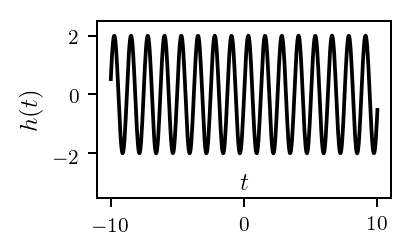

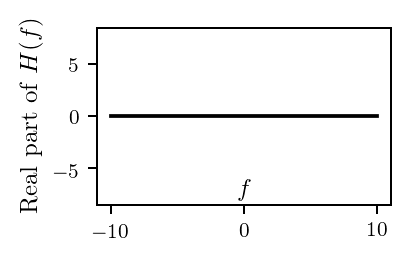

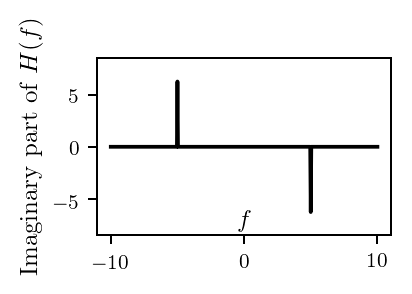

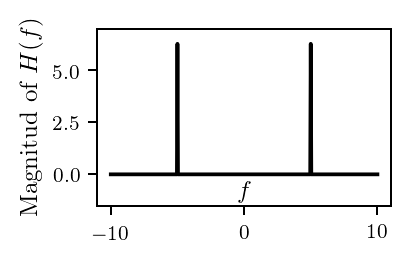

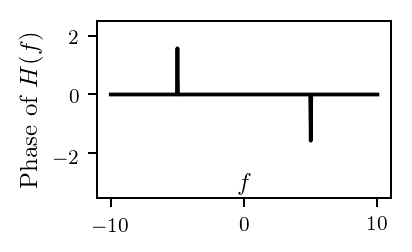

In [2]:
# Plot n. 1  sin signal and its fourier components
A = 2.

freq = 1.
omega = 5. #2*np.pi*freq
t = np.linspace(start=-10, stop=10, endpoint=True, num=501)
h = A * np.sin(omega * t)



pos_omega1 = np.where((omega-t)==0)[0][0]
pos_omega2 = np.where((omega+t)==0)[0][0]
H = (-1j * A * np.pi * signal.unit_impulse(len(t), pos_omega1) )+ (1j * A * np.pi * signal.unit_impulse(len(t), pos_omega2))



plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, h, 'k')
plt.ylim(-3.5, 2.5)
plt.xlabel(r'$t$', labelpad=-25)
plt.ylabel(r'$h(t)$')
# plt.savefig(outdir + 'sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.real(H), 'k')
plt.ylim(-8.5, 8.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Real part of $H(f)$')
# plt.savefig(outdir + 'real_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.imag(H), 'k')
plt.ylim(-8.5, 8.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Imaginary part of $H(f)$')
# plt.savefig(outdir + 'imag_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.abs(H), 'k')
plt.ylim(-1.5, 7)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Magnitud of $H(f)$')
# plt.savefig(outdir + 'mag_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.angle(H), 'k')
plt.ylim(-3.5, 2.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Phase of $H(f)$')
# plt.savefig(outdir + 'phase_sin_signal.pdf', format='pdf', bbox_inches='tight')



0.25


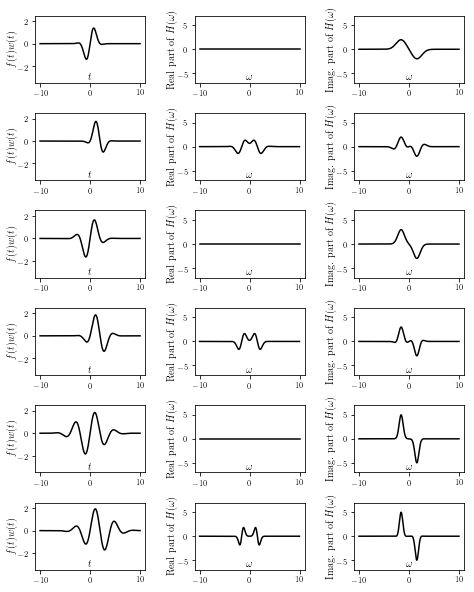

In [3]:
# Plot n. 2  windowed (gaussian) sin signal and its fourier components
A = 2.
omega = 1.
freq = 1/4.
omega = 2*np.pi*freq
print freq
t = np.linspace(start=-10, stop=10, endpoint=True, num=501)
f = A * np.sin(omega * t)

t0 = [0., 1.6]
sigma = [1.0, 1.5, 2.5]
figure_size = set_size(width_pt, subplots=(6, 3))

fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.real(H), 'k')
        ax[ff, 1].set_ylim(-7, 7)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Real part of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.imag(H), 'k')
        ax[ff, 2].set_ylim(-7, 7)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Imag. part of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_real_imag.pdf', format='pdf', bbox_inches='tight')

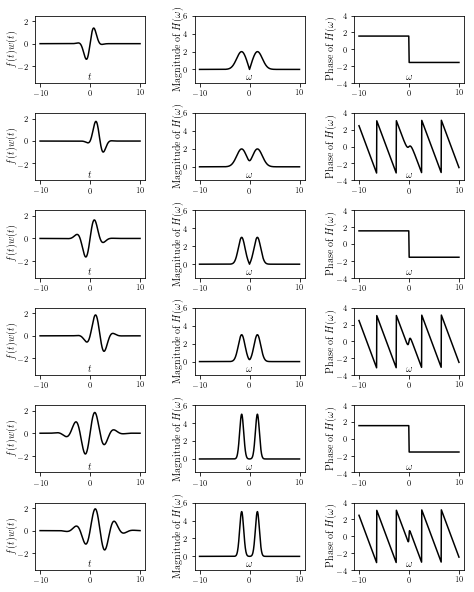

In [4]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.abs(H), 'k')
        ax[ff, 1].set_ylim(-1.5, 6)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Magnitude of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.angle(H), 'k')
        ax[ff, 2].set_ylim(-4, 4)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Phase of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_mag_phase.pdf', format='pdf', bbox_inches='tight')

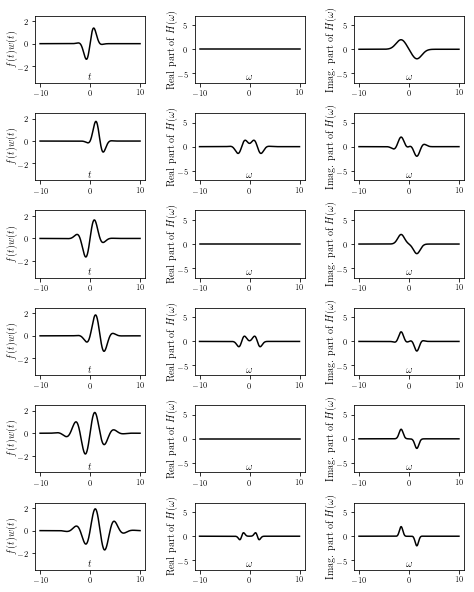

In [5]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        H /= sigma[jj]
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.real(H), 'k')#/sigma[jj]
        ax[ff, 1].set_ylim(-7, 7)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Real part of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.imag(H), 'k')#/sigma[jj]
        ax[ff, 2].set_ylim(-7, 7)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Imag. part of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_real_imag.pdf', format='pdf', bbox_inches='tight')

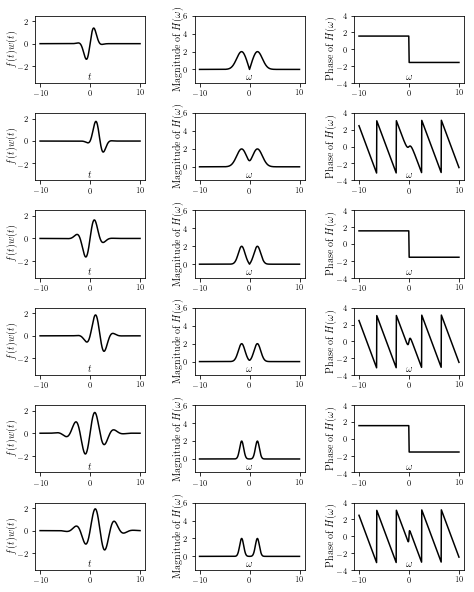

In [6]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        H /= sigma[jj]

        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.abs(H), 'k')#/sigma[jj]
        ax[ff, 1].set_ylim(-1.5, 6)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Magnitude of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.angle(H), 'k')
        ax[ff, 2].set_ylim(-4, 4)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Phase of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_mag_phase_normalized.pdf', format='pdf', bbox_inches='tight')

Figures demonstrate the result for a signal with $\omega_0=5$ and $A=2$. Figure  shows the continuous signal and  the real and imaginary parts and the magnitude and phase of its Fourier transform.  Figure  shows various windowed parts of the signal ($h(t)$) and the real and imaginary parts of their corresponding Fourier transforms.  Figure is the same as figure , but it shows the magnitude and phase of each Fourier transform. These Fourier transforms should be compared with their counterparts in figure  in order to appreciate the effect of both the size of the window and the locality of the window (Gaussian function). In all cases the main peaks of the Fourier transform's magnitude, which correspond to delta function impulses at $\omega=\pm 5$ in the continuous case, are preserved, but they become less sharp and the recovered value starts to move away from the real value as soon as the size of the window decreases. 

For the analysis of discrete signals it is possible to estimate the uncertainty principle. The easiest way is to consider signal segments and calculate the discrete Fourier transform (DFT) of each segment. This is the so-called Short Time Fourier Transform (STFT). If we consider an odd-sized window and associate the DFT that we calculate within it with the sample in the center of the window, we will be associating each sample of the signal with a small Fourier transform. In this context, how small the DTF is depends on the size of the window.

The problem with this method is that taking one part of the signal at a time is equivalent to using a rectangular window. When we calculate the Fourier transform of a discrete signal, we implicitly assume that the signal periodically repeats outside the window. This immediately introduces this repetition frequency. If the initial part of the window signal is different from the final part, when the two parts are placed next to each other, a sudden jump is created. This induces high frequencies in the Fourier domain.

Considering a discrete signal defined by

\begin{equation}\label{eq:discrete_signal}
    f(n) = A \sin \left(\frac{2 \pi n}{N}\right) \; \text{for} \; n= 0, 1, 2, \ldots, T
\end{equation}

where $N=10$, $T=127$ and $A=5$. Let us consider a window of length $2M + 1$. Therefore, to avoid border effects, the first sample on which we can place the center of the window is sample number $M$, and the last is sample number $T−M$. At each position $n$ of the window we compute the STFT for $n=M,\ldots,T−M$.

In this way, each sample $n$ is associated with $2\times(2 M+1)$ numbers, the values of the real and imaginary parts of the short time Fourier transform computed when the center of the window is placed at $n$. This is schematically shown in figure for some values of $n$ and for $M=8$. Each one of these numbers may be thought of as a feature of the signal computed locally. 


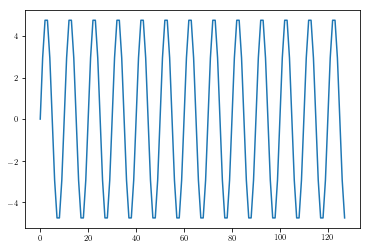

In [7]:
A = 5
N = 10
T = 127
M = 8

n = np.arange(T+1)
f = A * np.sin((2*np.pi*n)/N)


plt.figure()
plt.plot(n, f)

constant = A/np.sqrt(2*M+1)

F = np.zeros(len(n), dtype='complex128')
for nn in np.arange(M, (T-M)+1):
#     print nn
#     sin_cos = 0
#     sin_sin = 0
    for k, m in enumerate(np.arange(-M, M+1)):
#         print k, m
        sin_cos = np.sin((2*np.pi*(nn+m))/N) * np.cos((2*np.pi*k*m)/(2*M+1))
        sin_sin = np.sin((2*np.pi*(nn+m))/N) * np.sin((2*np.pi*k*m)/(2*M+1))
#         print sin_cos, sin_sin
#     F[nn] = constant * sin_cos - 1j * constant* sin_sin
        
# plt.figure()
# plt.plot(n, np.real(F))

# plt.figure()
# plt.plot(n, np.imag(F))

# plt.figure()
# plt.plot(n, np.abs(F))

# plt.figure()
# plt.plot(n, np.angle(F))

(64,) (64,)


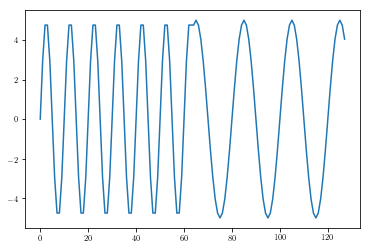

In [8]:
A = 5
N1 = 10
N2 = 20
T1 = 63
T = 127
M = 8

n = np.arange(T+1)
f1 = A * np.sin((2*np.pi*n)/N1)
f2 = A * np.sin((2*np.pi*n)/N2)

print f1[0:T1+1].shape, f2[T1+1:T+1].shape
f = np.hstack((f1[0:T1+1], f2[T1+1:T+1]))

plt.figure()
plt.plot(n, f)

constant = A/np.sqrt(2*M+1)

F = np.zeros(len(n), dtype='complex128')
for nn in np.arange(M, (T-M)+1):
#     print nn
#     sin_cos = 0
#     sin_sin = 0
    for k, m in enumerate(np.arange(-M, M+1)):
#         print k, m
        sin_cos = np.sin((2*np.pi*(nn+m))/N1) * np.cos((2*np.pi*k*m)/(2*M+1))
        sin_sin = np.sin((2*np.pi*(nn+m))/N1) * np.sin((2*np.pi*k*m)/(2*M+1))
#         print sin_cos, sin_sin
#     F[nn] = constant * sin_cos - 1j * constant* sin_sin
        
# plt.figure()
# plt.plot(n, np.real(F))

# plt.figure()
# plt.plot(n, np.imag(F))

# plt.figure()
# plt.plot(n, np.abs(F))

# plt.figure()
# plt.plot(n, np.angle(F))